Files already downloaded and verified
Files already downloaded and verified


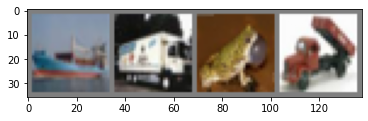

ship  truck frog  truck


In [ ]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

# (x_train, y_train), (x_test, y_test) = cifar10.load_data()
# assert x_train.shape == (50000, 32, 32, 3)
# assert x_test.shape == (10000, 32, 32, 3)
# assert y_train.shape == (50000, 1)
# assert y_test.shape == (10000, 1)

# x_train = np.array(x_train)
# x_test = np.array(x_test)
# x_train = x_train.reshape(50000,3072)
# x_test = x_test.reshape(10000,3072)


# k = 10



# def one_hot_encode(y,cla):
#   ohe = np.zeros((y.shape[0],cla))
#   for i,ys in enumerate(y):
#     ohe[i][ys] = 1
#   return ohe



transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))





class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()



criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)









# d = x_train.shape[1]
# n = x_train.shape[0]
# wt = np.zeros(d)
# W = np.array([wt]*k)
# W = W.T
# y_one = one_hot_encode(y_train,k)

# converge = 0

# eta = 0.001

# t=0
# tt=[]
# eee=[]
# ################# Gradient descent for J #################################

# ### Replace convergence with L1 norm #########################
# converge = False
# while not(converge):

#   w_old = W
#   # Calculate Gradients for J
#   GG1 = np.dot(x_train.T,(y_one - (np.dot(x_train , W))))/n
#   W = W + eta * GG1
#   print(np.dot(x_train,W))

#   # w_old = wt


#   # GG2 = np.dot(x_train.T,(y_train - (np.dot(x_train, wt))))/n
#   # wt = wt + (eta * GG2)

#   cost1 = 0.5*(np.linalg.norm((y_one - np.dot(x_train,W)),ord=2)**2) / n
#   print(cost1)


#   # converge = True
#   # converge = (np.absolute(W - w_old) < 0.0001 ).all()
#   err = 0
#   for i in range(n):
#     if y_one[i] != np.dot(x_train[i,W[i]]):
#         err = err+1
#   print(err*100/n)

#   dist = np.linalg.norm(W - w_old, axis=1)

#   if dist < 0.00001:
#     converge = False
#   else:
#     converge = True

#   # y1 = np.dot(x_train,W)
#   # y2 = np.argmax(y1,axis=1)
#   # err_train = 0
#   # for i in range(n):
#   #   if y2[i] != y_train[i]:
#   #     err_train += 1
#   # eee.append(err_train)
#   # print(err_train*100/n)
#   # t=t+1
#   # tt.append(t)


#   #Checking for convergence
#   # converge = 0
#   # for i in range(len(wt)):
#   #   if np.absolute(w_old[i] - wt[i]) <= 0.0001:
#   #     converge = converge + 1







In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.210
[1,  4000] loss: 1.930
[1,  6000] loss: 1.715
[1,  8000] loss: 1.603
[1, 10000] loss: 1.512
[1, 12000] loss: 1.449
[2,  2000] loss: 1.386
[2,  4000] loss: 1.348
[2,  6000] loss: 1.341
[2,  8000] loss: 1.293
[2, 10000] loss: 1.273
[2, 12000] loss: 1.262
Finished Training


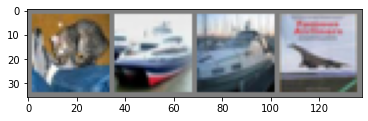

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Files already downloaded and verified
Files already downloaded and verified
[1,  1250] loss: 2.041
[1,  2500] loss: 1.908
[1,  3750] loss: 1.900
[1,  5000] loss: 1.835
[1,  6250] loss: 1.832
[1,  7500] loss: 1.834
[1,  8750] loss: 1.832
[1, 10000] loss: 1.799
[1, 11250] loss: 1.808
[1, 12500] loss: 1.784
Train accuracy =  39.656
Test accuracy =  38.65
[2,  1250] loss: 1.812
[2,  2500] loss: 1.785
[2,  3750] loss: 1.783
[2,  5000] loss: 1.775
[2,  6250] loss: 1.764
[2,  7500] loss: 1.758
[2,  8750] loss: 1.748
[2, 10000] loss: 1.741
[2, 11250] loss: 1.767
[2, 12500] loss: 1.750
Train accuracy =  41.114
Test accuracy =  40.14
[3,  1250] loss: 1.745
[3,  2500] loss: 1.724
[3,  3750] loss: 1.742
[3,  5000] loss: 1.728
[3,  6250] loss: 1.761
[3,  7500] loss: 1.762
[3,  8750] loss: 1.746
[3, 10000] loss: 1.723
[3, 11250] loss: 1.755
[3, 12500] loss: 1.720
Train accuracy =  42.01
Test accuracy =  40.66
[4,  1250] loss: 1.721
[4,  2500] loss: 1.725
[4,  3750] loss: 1.714
[4,  5000] loss: 1.723

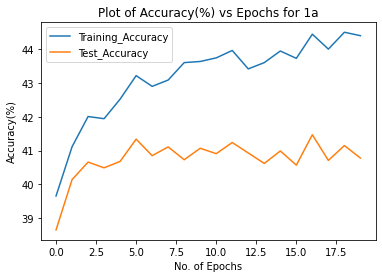

In [3]:
# Problem 1 a



import torch
import torch.nn as nn
import torch.nn.functional as F
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)




classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

############ Neural Network Class #########################
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        ####### No Conv Nets #######

        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(32*32*3, 10,bias=True)  

    def forward(self, x):

        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = self.fc1(x)
        return x
###############################################################


net = Net()
criterion = nn.CrossEntropyLoss()
MoM = 0.75
Eta = 0.0001
optimizer = optim.SGD(net.parameters(), lr=Eta, momentum=MoM)

Train_error = []
Test_error = []
Training_accuracy = []
EEPPOO = []

Test_accuracy = []

EE = []

############### Function for calculating the accuracy ###############
def accuracy(X):
  correct = 0
  total = 0
  with torch.no_grad():
      for data in X:
          images, labels = data
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  return correct * 100 / total
 ####################################################################
# def error(X):

#       for i, data in enumerate(X, 0):
#         # get the inputs; data is a list of [inputs, labels]
#         inputs, labels = data
        

#         # zero the parameter gradients

 
#         # forward + backward + optimize
#         outputs = net(inputs)
#         loss = criterion(outputs, labels)


#         # print statistics
#         running_loss += loss.item()
#       return running_loss / 50000

################# Training ##########################################

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    correct = 0
    total = 0
    n = 0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        

        # zero the parameter gradients
        optimizer.zero_grad()
 
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 1250 == 1249:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 1250:.3f}')
            running_loss = 0.0

    train_accuracy = accuracy(trainloader)
    test_accuracy = accuracy(testloader)
    print("Train accuracy = ",train_accuracy)
    print("Test accuracy = ",test_accuracy)
    Training_accuracy.append(train_accuracy)
    Test_accuracy.append(test_accuracy)


    EEPPOO.append(epoch)



           ########### Check with test ################
    # correct2 = 0
    # total2 = 0
    # running_loss2 = 0 
    # i = 0      
    # for data2 in testloader:
    #     images2, labels2 = data
    #     # calculate outputs by running images through the network
    #     outputs2 = net(images2)
    #     # the class with the highest energy is what we choose as prediction
    #     _, predicted2 = torch.max(outputs2.data, 1)
    #     total2 += labels2.size(0)
    #     correct2 += (predicted2 == labels2).sum().item()
    #     i = i + 1
    #     # Calcualte Error
    #     loss2 = criterion(outputs2, labels2)
    #     running_loss2 += loss2.item()


    # Training_loss.append(running_loss/n)
    # Test_error.append(running_loss2/i)
    # Training_accuracy.append(correct/total)
    # Test_accuracy.append(correct2/total2)
    # EEPPOO.append(epoch)







# since we're not training, we don't need to calculate the gradients for our outputs
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')



# plt.figure()
print("Momentum value = ",MoM)
print("Learning rate = ",Eta)

plt.figure()
plt.plot(EEPPOO,Training_accuracy,label='Training_Accuracy')
plt.plot(EEPPOO,Test_accuracy,label='Test_Accuracy')
# plt.plot(EEPPOO,Train_error,label='Training_Loss')
# plt.plot(EEPPOO,Test_error,label='Test_loss')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy(%)")
plt.title("Plot of Accuracy(%) vs Epochs for 1a")
plt.legend()
# plt.xlabel("No. of Epochs")
# plt.ylabel("Accuracy")
# plt.title("Accuracy vs No. of Epochs (1a)")
#plt.legend()
